## Markov Chain Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Metropolis
target_dist = lambda x : 0.3*np.exp(-0.2*x**2) + 0.7*np.exp(-0.2*(x-10)**2)

# proposal distribution이 symmetric한 경우
proposal_dist = lambda x : np.random.normal(loc=x, scale=2)


accept = []
reject = []

# 1. random initialization
init_point = 7


for _ in range(1000):
    
    # 2. next point recommendation
    next_point = proposal_dist(init_point)
    criteria = target_dist(next_point) / target_dist(init_point)

    if criteria > 1:
        v = target_dist(next_point)
        accept.append((next_point, v))
        init_point = next_point

    else:
        
        # 패자 부활전
        u = np.random.uniform(0, 1)
        
        criteria = np.min([1, criteria])
        
        if criteria > u:
            accept.append((next_point, v))
            init_point = next_point

        else:
            continue

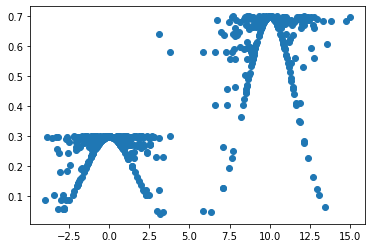

In [2]:
x = np.array(accept)[:, 0]
y = np.array(accept)[:, 1]

plt.scatter(x, y)

## Bayesian estimation using MCMC

In [3]:
# 모 분포
data = np.random.normal(loc=10, scale=3, size=30000)

# 표본 분포
sample_data = np.random.choice(data, size=3000)

std =  np.std(sample_data)

target_dist = lambda x : np.random.normal(loc=x, scale=std)
proposal_dist = lambda x : np.random.normal(loc=x, scale=0.5)

In [4]:
mu_old = 1

accepted = []
rejected = []

get_lik = lambda data, mu, std : np.sum(-np.log(std * np.sqrt(2* np.pi) ) - ((data-mu)**2) / (2*std**2))

for _ in range(10000):
    
    mu_new = proposal_dist(mu_old)
    
    #returns 1 for all valid values of mu. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of mu (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.

    prior_new = 1 if mu_new > 0 else 0
    prior_old = 1 if mu_old > 0 else 0
    
    new_lik = get_lik(sample_data, mu_new, std)
    lik = get_lik(sample_data, mu_old, std)
        
    x_new = new_lik + np.log(prior_new)
    x_old = lik + np.log(prior_old)
    
    critera = x_new > x_old

    if critera == True:
        mu_old = mu_new
        accepted.append((mu_new, std))
        
    else:

        # 패자 부활전
        u = np.random.uniform(0, 1)
        
        if np.exp(x_new - x_old) > u:
            mu_old = mu_new
            accepted.append((mu_new, std))

        else:
            rejected.append((mu_new,std))
            continue

(1423, 2)

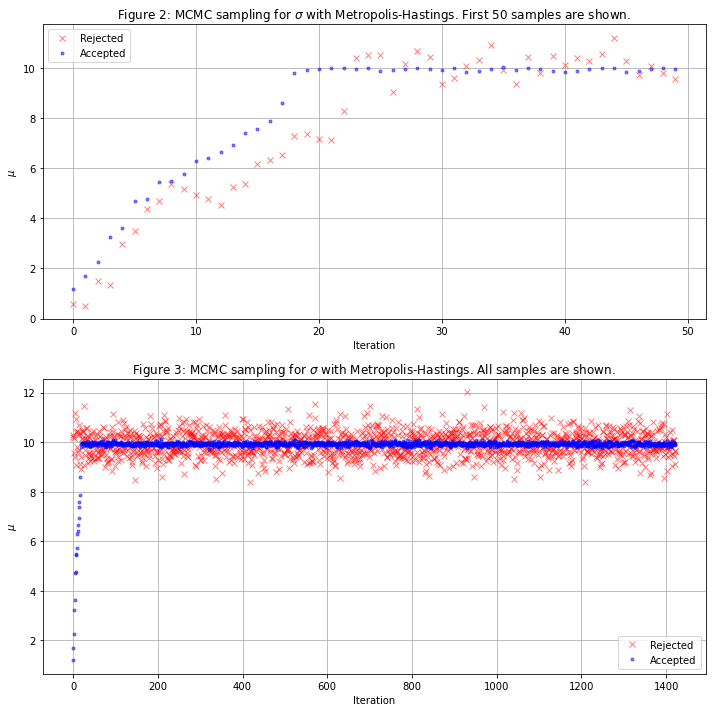

In [5]:
accepted , rejected = np.array(accepted), np.array(rejected)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,0], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,0], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\mu$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,0], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,0], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\mu$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape